In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Using Neural Network

In [2]:
df = pd.read_csv('IRIS.csv')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
from sklearn.preprocessing import StandardScaler
df_features = df[['sepal_length','sepal_width','petal_length','petal_width']]
scaler = StandardScaler()
df_features = scaler.fit_transform(X=df_features)

In [5]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
df_targets = df.species.to_numpy().reshape(-1,1)
df_targets = encoder.fit_transform(df_targets)
df_targets = df_targets.toarray()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features,df_targets, test_size=0.33, random_state=42)

In [7]:
# modeling 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras import backend as K

In [8]:
dimData = X_train.shape[1]
nClasses = y_train.shape[1]
advanced_act = LeakyReLU(alpha=.003)
model_reg = Sequential()
model_reg.add(Dense(10, activation= advanced_act , input_shape=(dimData,)))
model_reg.add(Dense(nClasses, activation='softmax'))


In [9]:
model_reg.weights

[<tf.Variable 'dense/kernel:0' shape=(4, 10) dtype=float32, numpy=
 array([[-0.24526492, -0.10616499, -0.33754674,  0.6459719 , -0.5687549 ,
         -0.15840784,  0.46222484, -0.41567823, -0.08831018,  0.26479584],
        [ 0.52113986,  0.0563795 ,  0.49819374,  0.11458403,  0.41020536,
          0.33711344, -0.47396052,  0.3216837 , -0.52307093, -0.10477728],
        [ 0.58205616, -0.36329788,  0.19515508, -0.4913926 , -0.3319317 ,
         -0.55967754, -0.09195191, -0.22678468, -0.51483715, -0.17107463],
        [ 0.4044839 , -0.26954356, -0.46666056,  0.3591683 , -0.49056542,
          0.42845774, -0.28667116, -0.00498164,  0.4374888 , -0.6532616 ]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(10, 3) dtype=float32, numpy=
 array([[-0.61805195,  0.22798246, -0.01554525],
        [-0.2011998 ,  0.49147332,  0.39064336],
        [ 0.627746

In [10]:
model_reg.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp_reg = model_reg.fit(X_train, y_train, batch_size=256, epochs=500, verbose=2,
                        validation_data=(X_test, y_test))

Epoch 1/500
1/1 - 0s - loss: 1.0698 - accuracy: 0.4500 - val_loss: 1.0755 - val_accuracy: 0.3600
Epoch 2/500
1/1 - 0s - loss: 1.0608 - accuracy: 0.4600 - val_loss: 1.0651 - val_accuracy: 0.3800
Epoch 3/500
1/1 - 0s - loss: 1.0520 - accuracy: 0.4600 - val_loss: 1.0549 - val_accuracy: 0.4200
Epoch 4/500
1/1 - 0s - loss: 1.0432 - accuracy: 0.4700 - val_loss: 1.0447 - val_accuracy: 0.4400
Epoch 5/500
1/1 - 0s - loss: 1.0345 - accuracy: 0.4900 - val_loss: 1.0347 - val_accuracy: 0.4600
Epoch 6/500
1/1 - 0s - loss: 1.0260 - accuracy: 0.5200 - val_loss: 1.0249 - val_accuracy: 0.5000
Epoch 7/500
1/1 - 0s - loss: 1.0175 - accuracy: 0.5400 - val_loss: 1.0152 - val_accuracy: 0.5000
Epoch 8/500
1/1 - 0s - loss: 1.0091 - accuracy: 0.5500 - val_loss: 1.0057 - val_accuracy: 0.5000
Epoch 9/500
1/1 - 0s - loss: 1.0008 - accuracy: 0.5600 - val_loss: 0.9963 - val_accuracy: 0.5400
Epoch 10/500
1/1 - 0s - loss: 0.9926 - accuracy: 0.5600 - val_loss: 0.9870 - val_accuracy: 0.5800
Epoch 11/500
1/1 - 0s - loss:

Epoch 85/500
1/1 - 0s - loss: 0.6188 - accuracy: 0.8000 - val_loss: 0.6002 - val_accuracy: 0.8000
Epoch 86/500
1/1 - 0s - loss: 0.6161 - accuracy: 0.8000 - val_loss: 0.5977 - val_accuracy: 0.8000
Epoch 87/500
1/1 - 0s - loss: 0.6134 - accuracy: 0.8000 - val_loss: 0.5952 - val_accuracy: 0.8000
Epoch 88/500
1/1 - 0s - loss: 0.6108 - accuracy: 0.8000 - val_loss: 0.5928 - val_accuracy: 0.8000
Epoch 89/500
1/1 - 0s - loss: 0.6082 - accuracy: 0.8000 - val_loss: 0.5904 - val_accuracy: 0.8000
Epoch 90/500
1/1 - 0s - loss: 0.6056 - accuracy: 0.8000 - val_loss: 0.5881 - val_accuracy: 0.8000
Epoch 91/500
1/1 - 0s - loss: 0.6031 - accuracy: 0.8000 - val_loss: 0.5858 - val_accuracy: 0.8000
Epoch 92/500
1/1 - 0s - loss: 0.6006 - accuracy: 0.8000 - val_loss: 0.5835 - val_accuracy: 0.8000
Epoch 93/500
1/1 - 0s - loss: 0.5982 - accuracy: 0.8000 - val_loss: 0.5813 - val_accuracy: 0.8000
Epoch 94/500
1/1 - 0s - loss: 0.5957 - accuracy: 0.8000 - val_loss: 0.5791 - val_accuracy: 0.8000
Epoch 95/500
1/1 - 0

Epoch 168/500
1/1 - 0s - loss: 0.4762 - accuracy: 0.8200 - val_loss: 0.4683 - val_accuracy: 0.8000
Epoch 169/500
1/1 - 0s - loss: 0.4750 - accuracy: 0.8200 - val_loss: 0.4672 - val_accuracy: 0.8000
Epoch 170/500
1/1 - 0s - loss: 0.4739 - accuracy: 0.8200 - val_loss: 0.4662 - val_accuracy: 0.8000
Epoch 171/500
1/1 - 0s - loss: 0.4728 - accuracy: 0.8200 - val_loss: 0.4651 - val_accuracy: 0.8000
Epoch 172/500
1/1 - 0s - loss: 0.4717 - accuracy: 0.8200 - val_loss: 0.4641 - val_accuracy: 0.8000
Epoch 173/500
1/1 - 0s - loss: 0.4706 - accuracy: 0.8200 - val_loss: 0.4630 - val_accuracy: 0.8000
Epoch 174/500
1/1 - 0s - loss: 0.4696 - accuracy: 0.8200 - val_loss: 0.4620 - val_accuracy: 0.8000
Epoch 175/500
1/1 - 0s - loss: 0.4685 - accuracy: 0.8200 - val_loss: 0.4609 - val_accuracy: 0.8000
Epoch 176/500
1/1 - 0s - loss: 0.4674 - accuracy: 0.8300 - val_loss: 0.4599 - val_accuracy: 0.8000
Epoch 177/500
1/1 - 0s - loss: 0.4664 - accuracy: 0.8300 - val_loss: 0.4589 - val_accuracy: 0.8000
Epoch 178/

Epoch 251/500
1/1 - 0s - loss: 0.4006 - accuracy: 0.8500 - val_loss: 0.3923 - val_accuracy: 0.8200
Epoch 252/500
1/1 - 0s - loss: 0.3997 - accuracy: 0.8500 - val_loss: 0.3914 - val_accuracy: 0.8200
Epoch 253/500
1/1 - 0s - loss: 0.3989 - accuracy: 0.8500 - val_loss: 0.3906 - val_accuracy: 0.8200
Epoch 254/500
1/1 - 0s - loss: 0.3980 - accuracy: 0.8500 - val_loss: 0.3897 - val_accuracy: 0.8200
Epoch 255/500
1/1 - 0s - loss: 0.3971 - accuracy: 0.8500 - val_loss: 0.3889 - val_accuracy: 0.8200
Epoch 256/500
1/1 - 0s - loss: 0.3963 - accuracy: 0.8500 - val_loss: 0.3880 - val_accuracy: 0.8200
Epoch 257/500
1/1 - 0s - loss: 0.3954 - accuracy: 0.8500 - val_loss: 0.3872 - val_accuracy: 0.8200
Epoch 258/500
1/1 - 0s - loss: 0.3946 - accuracy: 0.8500 - val_loss: 0.3863 - val_accuracy: 0.8200
Epoch 259/500
1/1 - 0s - loss: 0.3937 - accuracy: 0.8500 - val_loss: 0.3855 - val_accuracy: 0.8200
Epoch 260/500
1/1 - 0s - loss: 0.3929 - accuracy: 0.8500 - val_loss: 0.3847 - val_accuracy: 0.8200
Epoch 261/

Epoch 334/500
1/1 - 0s - loss: 0.3415 - accuracy: 0.8800 - val_loss: 0.3340 - val_accuracy: 0.8400
Epoch 335/500
1/1 - 0s - loss: 0.3409 - accuracy: 0.8800 - val_loss: 0.3334 - val_accuracy: 0.8400
Epoch 336/500
1/1 - 0s - loss: 0.3403 - accuracy: 0.8800 - val_loss: 0.3328 - val_accuracy: 0.8400
Epoch 337/500
1/1 - 0s - loss: 0.3397 - accuracy: 0.8800 - val_loss: 0.3322 - val_accuracy: 0.8400
Epoch 338/500
1/1 - 0s - loss: 0.3391 - accuracy: 0.8800 - val_loss: 0.3317 - val_accuracy: 0.8400
Epoch 339/500
1/1 - 0s - loss: 0.3386 - accuracy: 0.8800 - val_loss: 0.3311 - val_accuracy: 0.8400
Epoch 340/500
1/1 - 0s - loss: 0.3380 - accuracy: 0.8900 - val_loss: 0.3305 - val_accuracy: 0.8400
Epoch 341/500
1/1 - 0s - loss: 0.3374 - accuracy: 0.8900 - val_loss: 0.3299 - val_accuracy: 0.8400
Epoch 342/500
1/1 - 0s - loss: 0.3368 - accuracy: 0.8900 - val_loss: 0.3293 - val_accuracy: 0.8400
Epoch 343/500
1/1 - 0s - loss: 0.3362 - accuracy: 0.8900 - val_loss: 0.3288 - val_accuracy: 0.8400
Epoch 344/

Epoch 417/500
1/1 - 0s - loss: 0.2978 - accuracy: 0.9100 - val_loss: 0.2879 - val_accuracy: 0.8600
Epoch 418/500
1/1 - 0s - loss: 0.2973 - accuracy: 0.9100 - val_loss: 0.2874 - val_accuracy: 0.8600
Epoch 419/500
1/1 - 0s - loss: 0.2968 - accuracy: 0.9100 - val_loss: 0.2868 - val_accuracy: 0.8600
Epoch 420/500
1/1 - 0s - loss: 0.2963 - accuracy: 0.9100 - val_loss: 0.2863 - val_accuracy: 0.8600
Epoch 421/500
1/1 - 0s - loss: 0.2959 - accuracy: 0.9100 - val_loss: 0.2858 - val_accuracy: 0.8600
Epoch 422/500
1/1 - 0s - loss: 0.2954 - accuracy: 0.9100 - val_loss: 0.2852 - val_accuracy: 0.8600
Epoch 423/500
1/1 - 0s - loss: 0.2949 - accuracy: 0.9100 - val_loss: 0.2847 - val_accuracy: 0.8600
Epoch 424/500
1/1 - 0s - loss: 0.2944 - accuracy: 0.9100 - val_loss: 0.2842 - val_accuracy: 0.8600
Epoch 425/500
1/1 - 0s - loss: 0.2940 - accuracy: 0.9100 - val_loss: 0.2836 - val_accuracy: 0.8600
Epoch 426/500
1/1 - 0s - loss: 0.2935 - accuracy: 0.9100 - val_loss: 0.2831 - val_accuracy: 0.8600
Epoch 427/

Epoch 500/500
1/1 - 0s - loss: 0.2601 - accuracy: 0.9300 - val_loss: 0.2448 - val_accuracy: 0.8800


Text(0.5, 1.0, 'Loss Curves')

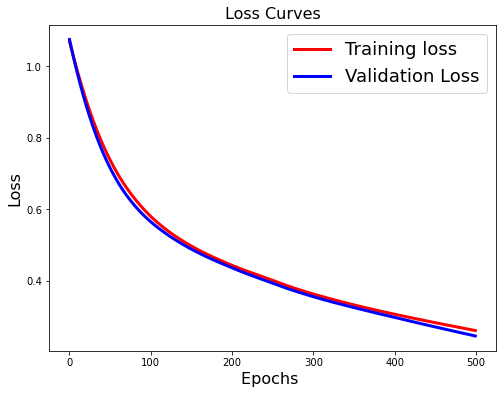

In [11]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(mlp_reg.history['loss'],'r',linewidth=3.0)
plt.plot(mlp_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

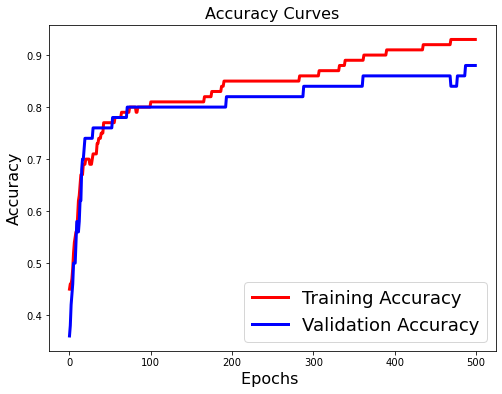

In [12]:
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(mlp_reg.history['accuracy'],'r',linewidth=3.0)
plt.plot(mlp_reg.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## Using Genetic Algorithm

In [13]:
model_reg.weights

[<tf.Variable 'dense/kernel:0' shape=(4, 10) dtype=float32, numpy=
 array([[-0.0849933 ,  0.04522821, -0.5376398 ,  0.6290592 , -0.47036383,
         -0.39936632,  0.26719198, -0.29618073,  0.389771  ,  0.06482445],
        [ 0.08697278, -0.07629579,  0.5759844 , -0.19965516,  0.35173988,
          0.42218193, -0.32287356,  0.237171  , -0.7401641 ,  0.06776444],
        [ 0.9316034 , -0.2116019 ,  0.00528398, -0.12476644, -0.24134853,
         -0.78036845, -0.31338847, -0.1196433 , -0.28429285, -0.37512743],
        [ 0.80996907, -0.12068684, -0.65294915,  0.7544166 , -0.4010547 ,
          0.21886131, -0.52423453,  0.10187338,  0.00962463, -0.8500952 ]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=
 array([ 0.3216859 , -0.12960148,  0.18480757,  0.0043382 , -0.09795842,
         0.26679897,  0.02662679, -0.12205771,  0.4671176 ,  0.15541807],
       dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(10, 3) dtype=float32, numpy=
 array([[

In [14]:
# creating  population with random weights
population_size = 50
# W1 size(4,10)  ip-hidden
# W2 size (10,)  act hidden
# W3 size (10,3) hidden-output
# W4 size (3) output act

# generate this for 50 population
W1_shape = K.eval(model_reg.weights[0]).shape
W2_shape = K.eval(model_reg.weights[1]).shape
W3_shape = K.eval(model_reg.weights[2]).shape
W4_shape = K.eval(model_reg.weights[3]).shape

W1 =np.random.randn(W1_shape[0],W1_shape[1])
W2 =np.random.randn(W2_shape[0])
W3 =np.random.randn(W3_shape[0],W3_shape[1])
W4 =np.random.randn(W4_shape[0])


In [49]:
model_reg.weights

[<tf.Variable 'dense/kernel:0' shape=(4, 10) dtype=float32, numpy=
 array([[-0.0849933 ,  0.04522821, -0.5376398 ,  0.6290592 , -0.47036383,
         -0.39936632,  0.26719198, -0.29618073,  0.389771  ,  0.06482445],
        [ 0.08697278, -0.07629579,  0.5759844 , -0.19965516,  0.35173988,
          0.42218193, -0.32287356,  0.237171  , -0.7401641 ,  0.06776444],
        [ 0.9316034 , -0.2116019 ,  0.00528398, -0.12476644, -0.24134853,
         -0.78036845, -0.31338847, -0.1196433 , -0.28429285, -0.37512743],
        [ 0.80996907, -0.12068684, -0.65294915,  0.7544166 , -0.4010547 ,
          0.21886131, -0.52423453,  0.10187338,  0.00962463, -0.8500952 ]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=
 array([ 0.3216859 , -0.12960148,  0.18480757,  0.0043382 , -0.09795842,
         0.26679897,  0.02662679, -0.12205771,  0.4671176 ,  0.15541807],
       dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(10, 3) dtype=float32, numpy=
 array([[

In [15]:
print(W1)
print(W2)
print(W3)
print(W4)

[[ 0.35443981  0.66803099  0.29004008 -0.45719189  0.24891545  1.20406332
  -0.59532674 -1.44839741  0.79229976 -0.49075958]
 [ 1.57892348 -1.26455781  1.6198149  -0.16752472  0.71475664  0.59041961
   0.38164193 -1.36532479  0.41545268  0.41742996]
 [ 0.82553709 -0.70025703 -1.74534932 -0.7059108  -1.26391142 -0.5049494
  -0.37696073  0.72202087  0.27568001  0.60431344]
 [-1.17631896  0.32494014  0.64399221 -0.52898301 -0.40093819 -0.98216361
   1.07364233  1.44047975 -2.03969989  1.07992109]]
[-1.34946067  0.6438265   0.71279714 -0.25338225 -1.50795284 -0.00746527
 -0.18397     0.68575712 -0.23492612 -0.40645689]
[[ 0.15229583  0.50874746  1.10702395]
 [ 1.33150189  2.1105195   0.05572383]
 [-0.57742113 -0.53730084 -0.47314108]
 [-0.16503949  0.09655009 -0.17219591]
 [-0.39712472  0.70713785  0.19980423]
 [ 0.92463895 -0.53574372 -0.25563892]
 [ 0.44977489 -1.61188234 -0.23522354]
 [ 1.40359903 -0.90858298 -1.43885776]
 [ 0.82011961  0.67484254  0.12362171]
 [ 1.53524049  0.78569151 

In [22]:
class Gene:
    def __init__(self,W1_shape,W2_shape,W3_shape,W4_shape):
        self.W1 =np.random.randn(W1_shape[0],W1_shape[1])
        self.W2 =np.random.randn(W2_shape[0])
        self.W3 =np.random.randn(W3_shape[0],W3_shape[1])
        self.W4 =np.random.randn(W4_shape[0])

        

In [23]:
class genetic_algo:
    def __init__(self,pop_size):
        self.popualtion_size = pop_size
        self.gene = []
        
    # generate population
    def generate_population(self,W1_shape,W2_shape,W3_shape,W4_shape):
        for i in range(self.popualtion_size):
            self.gene.append(Gene(W1_shape,W2_shape,W3_shape,W4_shape))
            
    #Foward propagate function
    """def forward_prop(self):
        #code
        
        
        return loss"""
    
    #Natural_Selection
    
    
    #Reproduction
    
    
    #Mutuation
    
    
    
    

In [50]:
Population = genetic_algo(10)

In [51]:
Population.generate_population(W1_shape,W2_shape,W3_shape,W4_shape)

In [53]:
for i in range(Population.popualtion_size):
    print(Population.gene[i].W1)

[[ 2.29167815e-01  1.28268038e+00 -9.66502974e-01 -4.87866672e-01
   7.42162204e-01 -6.89093189e-01  3.30390884e-03  1.13560437e-01
   6.42864082e-01 -6.19456851e-01]
 [-3.04785005e-02  3.36790185e-01  6.53425248e-01  1.36715295e+00
   9.54927923e-01  8.13272880e-01  1.81383182e+00  9.80306311e-01
  -3.08623700e-01  1.20217115e-02]
 [ 1.97748771e+00 -1.69159010e-03 -1.51915557e-01  1.97211376e-01
  -1.44922373e+00 -8.44215392e-01  8.91234361e-01  7.50608209e-01
  -1.16751434e+00 -8.65443062e-02]
 [ 6.77849431e-01 -1.68686069e+00  5.82855022e-02 -1.91305886e-01
  -1.38465743e+00  1.90184826e+00 -1.38036320e+00 -8.13377235e-03
  -9.32485483e-01  4.96763608e-01]]
[[-2.20946851 -0.17760572  0.50389514  0.23715971  0.27720632  0.77369188
   0.01607968 -0.34726525 -0.19843689 -0.64987153]
 [-1.03848073 -1.11877928 -0.32276276  0.37614334 -0.17445311 -0.14393068
   0.31585021 -1.65776653 -1.08447728  1.19327093]
 [-0.86445506 -0.01534018 -0.20959632  0.82257551 -0.88330695 -1.29514901
   2.76

__main__.Gene